![imagen](https://cdn.foodbeast.com/content/wp-content/uploads/2012/03/beer-print-01-selectism.jpg)

# Ejercicio pandas estadistica
Para este ejercicio se ha utilizado [un dataset de un concurso de kaggle](https://www.kaggle.com/nickhould/craft-cans), cuyo reto consiste en predecir el tipo de cerveza en función de sus características (nivel de alcohol, amargura, tamaño...).

# Ejercicio 1
Importa las librerias que consideres

In [88]:
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns

## Ejercicio 2
1. Importa el dataset "datasets_beer.csv"
2. Imprime por pantalla los primeros registros.
3. ¿Cuáles son sus columnas?
4. ¿Qué dimensiones tiene el DataFrame?

In [116]:
# 1.
df = pd.read_csv('datasets_beers.csv')

# 2.
df.head()

,Unnamed: 0,abv,ibu,id,name,style,brewery_id,ounces
0,0,0.050,NaN,1436,Pub Beer,American Pale Lager,408,12.0
1,1,0.066,NaN,2265,Devil's Cup,American Pale Ale (APA),177,12.0
2,2,0.071,NaN,2264,Rise of the Phoenix,American IPA,177,12.0
3,3,0.090,NaN,2263,Sinister,American Double / Imperial IPA,177,12.0
4,4,0.075,NaN,2262,Sex and Candy,American IPA,177,12.0


In [13]:
# 3.
df.columns

Index(['Unnamed: 0', 'abv', 'ibu', 'id', 'name', 'style', 'brewery_id',
       'ounces'],
      dtype='object')

In [14]:
# 4.
df.shape

(2410, 8)

## Ejercicio 3
[Elimina la columna "Unnamed: 0"](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.drop.html)

In [157]:
df.drop(columns=['Unnamed: 0'], inplace=True)
df.head()

,abv,ibu,id,name,style,brewery_id,ounces
0,0.050,NaN,1436,Pub Beer,American Pale Lager,408,12.0
1,0.066,NaN,2265,Devil's Cup,American Pale Ale (APA),177,12.0
2,0.071,NaN,2264,Rise of the Phoenix,American IPA,177,12.0
3,0.090,NaN,2263,Sinister,American Double / Imperial IPA,177,12.0
4,0.075,NaN,2262,Sex and Candy,American IPA,177,12.0


## Ejercicio 4
¿Cuántas filas y columnas tiene el dataset?

In [16]:
df.shape

(2410, 7)

## Ejercicio 5
¿De qué tipo son los datos?

In [18]:
df.dtypes

abv           float64
ibu           float64
id              int64
name           object
style          object
brewery_id      int64
ounces        float64
dtype: object

## Ejercicio 6
Obtén en una nuevo DataFrame un resumen con las principales estadísticas de las columnas numércias: mean, max, count, cuantiles...

In [19]:
df.describe()

,abv,ibu,id,brewery_id,ounces
count,2348.000000,1405.000000,2410.000000,2410.000000,2410.000000
mean,0.059773,42.713167,1431.113278,231.749793,13.592241
std,0.013542,25.954066,752.459975,157.685604,2.352204
min,0.001000,4.000000,1.000000,0.000000,8.400000
25%,0.050000,21.000000,808.250000,93.000000,12.000000
50%,0.056000,35.000000,1453.500000,205.000000,12.000000
75%,0.067000,64.000000,2075.750000,366.000000,16.000000
max,0.128000,138.000000,2692.000000,557.000000,32.000000


## Ejercicio 7
¿Cuántas birras hay de cada estilo en este dataset? [Investiga en la documentación de Series](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.html) si puedes hacer un conteo de valores.

In [32]:
df['style'].value_counts()

American IPA                      424
American Pale Ale (APA)           245
American Amber / Red Ale          133
American Blonde Ale               108
American Double / Imperial IPA    105
                                 ... 
Other                               1
Kristalweizen                       1
Wheat Ale                           1
Smoked Beer                         1
Braggot                             1
Name: style, Length: 99, dtype: int64

## Ejercicio 8
1. Imprime por pantalla los registros del 10 al 20
2. De esos registros, imprime por pantalla desde la columna `name` a `ounces`, ambas incluidas
3. Quédate con las columnas `abv`, `ibu` y `ounces`, y además quédate sólo con los registros 10 al 20.
4. Convierte el resultado del apartado 3 en un array de `numpy`

In [52]:
# 1
df.iloc[10:21]

# 2
df.loc[10:21, 'name':'ounces']

# 3
df.iloc[10:21][['abv', 'ibu', 'ounces']]

# 4
np.array(df.iloc[10:21][['abv', 'ibu', 'ounces']])

array([[ 0.072,    nan, 12.   ],
       [ 0.073,    nan, 12.   ],
       [ 0.069,    nan, 12.   ],
       [ 0.085,    nan, 12.   ],
       [ 0.061, 60.   , 12.   ],
       [ 0.06 ,    nan, 12.   ],
       [ 0.06 ,    nan, 12.   ],
       [ 0.06 ,    nan, 12.   ],
       [ 0.06 ,    nan, 12.   ],
       [ 0.082,    nan, 12.   ],
       [ 0.082,    nan, 12.   ]])

## Ejercicio 9
¿Cuántas onzas pesan todas las birras del dataset?

In [53]:
df.ounces.sum()

32757.3

## Ejercicio 10
El amargor de las cervezas se mide por su nivel de IBUs.
1. ¿Cuál es el amargor medio de las cervezas?
2. ¿El máximo? ¿Y el mínimo?
3. ¿Qué cerveza es la que tiene el amargor máximo? ¿Cuál es la de amargor mínimo?

In [81]:
# 1
print(f'Amargor medio: {round(df.ibu.mean(), 2)}')

# 2
print(f'Amargor máximo: {df.ibu.max()}\nAmargor mínimo: {df.ibu.min()}')

# 3
df[df.ibu == df.ibu.max()]

Amargor medio: 42.71
Amargor máximo: 138.0
Amargor mínimo: 4.0


,abv,ibu,id,name,style,brewery_id,ounces
147,0.082,138.0,980,Bitter Bitch Imperial IPA,American Double / Imperial IPA,374,12.0


In [74]:
df[df.ibu == df.ibu.min()]

,abv,ibu,id,name,style,brewery_id,ounces
106,0.056,4.0,1350,Summer Solstice,Cream Ale,171,12.0
112,0.056,4.0,753,Summer Solstice Cerveza Crema (2009),Cream Ale,171,12.0
117,0.056,4.0,77,Summer Solstice (2011),Cream Ale,171,12.0


In [79]:
df.name[df.ibu == df.ibu.max()]

147    Bitter Bitch Imperial IPA
Name: name, dtype: object

## Ejercicio 11
No queda muy claro cuánto de dispar, de dispersa, es la medida de IBU. Mediante estadística descriptiva (una o dos métricas, sin gráficas), razona la dispersión de la variable IBU.

In [83]:
print(f'''
Desviacion tipica IBU: {round(df.ibu.std(), 2)}
Media IBU: {round(df.ibu.mean(), 2)}
''')


Desviacion tipica IBU: 25.95
Media IBU: 42.71



## Ejercicio 12
¿Existe alguna relación lineal entre las variables numéricas del dataset? Intenta pintar este razonmiento mediante un gráfico

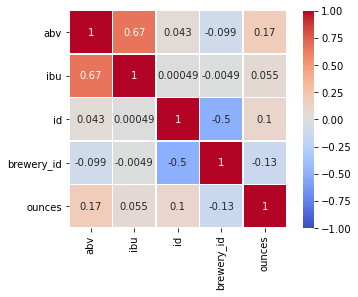

In [92]:
sns.heatmap(df.corr(),
           vmin=-1,
           vmax=1,
           cmap=sns.color_palette("coolwarm", as_cmap=True),
           square=True,
           linewidths=0.5,
           annot=True);

## Ejercicio 13
Representa el nivel de alcohol (columna `abv`) en un histograma. ¿Se trata de una distribución simétrica o asimétrica?

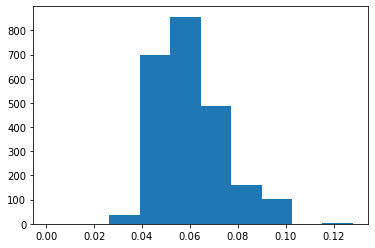

In [95]:
plt.hist(df.abv);

## Ejercicio 14
Representa mediante un *boxplot* de `seaborn` la variable `abv`

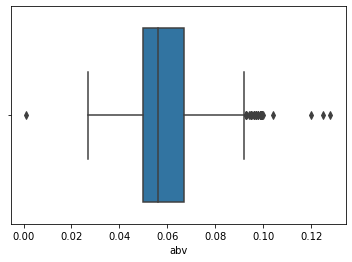

In [96]:
sns.boxplot(df.abv);

## Ejercicio 15
1. ¿Qué estilos son los que tienen en media más alcohol?
2. ¿Y los estilos que son en media más amargos?

In [109]:
# 1
df.groupby('style')['abv'].mean().sort_values(ascending=False)

# 2
df.groupby('style')['ibu'].mean().sort_values(ascending=False)

style
American Barleywine                   96.00
American Double / Imperial IPA        93.32
Russian Imperial Stout                86.50
American Double / Imperial Pilsner    85.00
Belgian Strong Dark Ale               72.00
                                      ...  
Kristalweizen                           NaN
Low Alcohol Beer                        NaN
Mead                                    NaN
Rauchbier                               NaN
Shandy                                  NaN
Name: ibu, Length: 99, dtype: float64

## Ejercicio 16
Carga el datasets de cervecerias `datasets_breweries.csv`

In [158]:
df2 = pd.read_csv('datasets_breweries.csv')
df2.head()

,Unnamed: 0,name,city,state
0,0,NorthGate Brewing,Minneapolis,MN
1,1,Against the Grain Brewery,Louisville,KY
2,2,Jack's Abby Craft Lagers,Framingham,MA
3,3,Mike Hess Brewing Company,San Diego,CA
4,4,Fort Point Beer Company,San Francisco,CA


## Ejercicio 17
1. Renombra la columna `Unnamed: 0` como `brewery_id`
2. Renombra tb la columna `name` por `brewery_name`. ¿Puedes hacer ambos apartados en una sola sentencia?

In [159]:
df2.rename(columns={'Unnamed: 0': 'brewery_id',
          'name': 'brewery_name'}, inplace=True)
df2.head()

,brewery_id,brewery_name,city,state
0,0,NorthGate Brewing,Minneapolis,MN
1,1,Against the Grain Brewery,Louisville,KY
2,2,Jack's Abby Craft Lagers,Framingham,MA
3,3,Mike Hess Brewing Company,San Diego,CA
4,4,Fort Point Beer Company,San Francisco,CA


## Ejercicio 18
Junta los dos datasets que tienes

In [160]:
df3 = df.merge(df2, on='brewery_id')
df3.head()

,abv,ibu,id,name,style,brewery_id,ounces,brewery_name,city,state
0,0.050,NaN,1436,Pub Beer,American Pale Lager,408,12.0,10 Barrel Brewing Company,Bend,OR
1,0.066,NaN,2265,Devil's Cup,American Pale Ale (APA),177,12.0,18th Street Brewery,Gary,IN
2,0.071,NaN,2264,Rise of the Phoenix,American IPA,177,12.0,18th Street Brewery,Gary,IN
3,0.090,NaN,2263,Sinister,American Double / Imperial IPA,177,12.0,18th Street Brewery,Gary,IN
4,0.075,NaN,2262,Sex and Candy,American IPA,177,12.0,18th Street Brewery,Gary,IN


## Ejercicio 19
1. ¿Cuántos estados diferentes hay?
2. ¿Y ciudades diferentes?
3. ¿Cuántas vervecerías hay?

In [161]:
print(f'''
Nº de estados: {len(df3.state.unique())}
Nº de ciudades: {len(df3.city.unique())}
Nº de cervecerias: {len(df3.brewery_name.unique())}
''')


Nº de estados: 51
Nº de ciudades: 384
Nº de cervecerias: 551



## Ejercicio 20
Agrupa por estado y ciudad, la media, mediana y máximo nivel de alcohol

In [162]:
df3.groupby(['state', 'city']).agg(['mean', 'median', 'max'])['abv']

mean  median    max
state city                               
 AK   Anchorage   0.054200  0.0520  0.063
      Juneau      0.053000  0.0530  0.053
      Soldotna    0.058500  0.0580  0.068
      Talkeetna   0.059500  0.0585  0.065
 AL   Birmingham  0.065400  0.0600  0.093
...                    ...     ...    ...
 WI   Wilson      0.055000  0.0550  0.055
 WV   Lewisburg   0.062000  0.0620  0.067
 WY   Jackson     0.054857  0.0520  0.068
      Pinedale    0.061000  0.0610  0.072
      Sheridan    0.052833  0.0480  0.070

[401 rows x 3 columns]

## Ejercicio 21
¿Cuáles son las cervezas más amargas que se consumen en Indiana, estado = `IN`?

In [163]:
df3[df3.state == ' IN'].sort_values(by='ibu', ascending=False)[['name', 'ibu', 'city', 'state']]

,name,ibu,city,state
479,Hopkick Dropkick,115.0,Michigan City,IN
2191,Overlord Imperial IPA,115.0,Evansville,IN
811,Half Cycle IPA,104.0,Indianapolis,IN
2062,Isis,91.0,Indianapolis,IN
2189,Csar,90.0,Evansville,IN
...,...,...,...,...
2056,The Deuce,NaN,Indianapolis,IN
2061,Chaka,NaN,Indianapolis,IN
2190,Klingon Warnog Roggen Dunkel,NaN,Evansville,IN
2277,Dragonfly IPA,NaN,Bloomington,IN


## Ejercicio 22
Obtén una tabla con los principales estadísticos del campo `ibu`,  a nivel ciudad

In [164]:
df3.groupby('city')['ibu'].describe()

,count,mean,std,min,25%,50%,75%,max
city,,,,,,,,
Abingdon,1.0,135.000000,NaN,135.0,135.00,135.0,135.00,135.0
Abita Springs,3.0,27.333333,21.455380,13.0,15.00,17.0,34.50,52.0
Ada,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Afton,4.0,43.000000,19.899749,22.0,28.00,45.0,60.00,60.0
Airway Heights,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
Woodinville,4.0,46.750000,18.643587,27.0,39.75,44.0,51.00,72.0
Worcester,1.0,69.000000,NaN,69.0,69.00,69.0,69.00,69.0
Yakima,2.0,54.000000,22.627417,38.0,46.00,54.0,62.00,70.0


## Ejercicio 23
Consigue en un DataFrame todas las cervezas en cuyas cervecerías el mínimo nivel de `abv` sea de 0.07.

In [165]:
def filter_func(x):
    return x['abv'].min() > 0.07

df3.groupby('brewery_name').filter(filter_func)

,abv,ibu,id,name,style,brewery_id,ounces,brewery_name,city,state
212,0.088,108.0,1806,Hoptopus Double IPA,American Double / Imperial IPA,306,16.0,Beach Brewing Company,Virginia Beach,VA
275,0.072,75.0,2620,Saucy Intruder,Rye Beer,18,16.0,Black Acre Brewing Co.,Indianapolis,IN
309,0.080,80.0,1812,Quarter Mile Double IPA,American Double / Imperial IPA,304,12.0,Blue Hills Brewery,Canton,MA
354,0.071,16.0,2062,Noche Dulce,American Porter,231,16.0,Borderlands Brewing Company,Tucson,AZ
594,0.089,126.0,2440,Bay of Bengal Double IPA (2014),American Double / Imperial IPA,99,12.0,Christian Moerlein Brewing Company,Cincinnati,OH
690,0.072,NaN,1623,Lift Off IPA,American IPA,358,16.0,Daredevil Brewing Company,Shelbyville,IN
1142,0.071,NaN,2163,Sucha Much IPA,American IPA,208,12.0,Kalona Brewing Company,Kalona,IA
1143,0.075,24.0,2162,Lewbricator Wheat Dopplebock,Doppelbock,208,12.0,Kalona Brewing Company,Kalona,IA
1186,0.080,NaN,1637,Bellingham Beer Week 2013 Collaboration,Belgian Strong Dark Ale,354,16.0,Kulshan Brewery,Bellingham,WA
1409,0.082,NaN,1952,Train Wreck,American Amber / Red Ale,260,16.0,Mountain Town Brewing Company,Mount Pleasant,MI


## Ejercicio 24
Teniendo en cuenta la media de amargor de todas las cervezas, obtén una tabla con las cervezas cuyos estados tengan una media de amargor en cerveza por encima de la media

In [166]:
media_ibu = df3.ibu.mean()

def filter_func(x):
    return x.ibu.mean() > media_ibu

df3.groupby('state').filter(filter_func)

,abv,ibu,id,name,style,brewery_id,ounces,brewery_name,city,state
0,0.050,NaN,1436,Pub Beer,American Pale Lager,408,12.0,10 Barrel Brewing Company,Bend,OR
1,0.066,NaN,2265,Devil's Cup,American Pale Ale (APA),177,12.0,18th Street Brewery,Gary,IN
2,0.071,NaN,2264,Rise of the Phoenix,American IPA,177,12.0,18th Street Brewery,Gary,IN
3,0.090,NaN,2263,Sinister,American Double / Imperial IPA,177,12.0,18th Street Brewery,Gary,IN
4,0.075,NaN,2262,Sex and Candy,American IPA,177,12.0,18th Street Brewery,Gary,IN
...,...,...,...,...,...,...,...,...,...,...
2405,0.067,45.0,928,Belgorado,Belgian IPA,424,12.0,Wynkoop Brewing Company,Denver,CO
2406,0.052,NaN,807,Rail Yard Ale,American Amber / Red Ale,424,12.0,Wynkoop Brewing Company,Denver,CO
2407,0.055,NaN,620,B3K Black Lager,Schwarzbier,424,12.0,Wynkoop Brewing Company,Denver,CO
2408,0.055,40.0,145,Silverback Pale Ale,American Pale Ale (APA),424,12.0,Wynkoop Brewing Company,Denver,CO
